In [8]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk import word_tokenize

from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Nmf

import utils

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
stemmer = PorterStemmer()

In [538]:
# tdf = pd.read_csv('transcripts/transcripts.csv', index_col=0)
# sdf = pd.read_csv('transcripts/speeches.csv', index_col=0)
# tdf = pd.read_csv('transcripts/transcripts_sents.csv', index_col=0)
# sdf = pd.read_csv('transcripts/speech_sents.csv', index_col=0)
tdf = pd.read_csv('transcripts_enhanced.csv')
sdf = pd.read_csv('speeches_enhanced.csv')

In [539]:
sdf['tokens'] = sdf['text_enhanced'].apply(lambda x: utils.process(x, stemmer=stemmer))

In [540]:
tdf['tokens'] = tdf['text_enhanced'].apply(lambda x : utils.process(x, stemmer=stemmer)) 

In [541]:
texts = tdf['tokens'].tolist() + sdf['tokens'].tolist()

In [7]:
len(texts)

525204

In [542]:
dictionary = Dictionary(texts)

# dictionary.filter_n_most_frequent(10)
# dictionary.compactify()
corpus = [dictionary.doc2bow(text) for text in texts]

### EVENTUALLY USE MORE SOPHISTICATED PROCEDURE TO SELECT NUMBER OF TOPICS

In [ ]:
def coherence_compare(corpus, start, stop, step):
    for i in range(start, stop, step):
        lda = LdaModel(corpus, i, id2word=dictionary, passes=1)
        cm = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary)
        print(cm.get_coherence())
coherence_compare(corpus, 2, 4, 3)

In [543]:
ldamodel = LdaModel(corpus, num_topics=40, id2word=dictionary, passes=1, random_state=0, minimum_probability=0)

In [483]:
nmf = Nmf(corpus, id2word=dictionary, num_topics=45, random_state=0, minimum_probability=0)

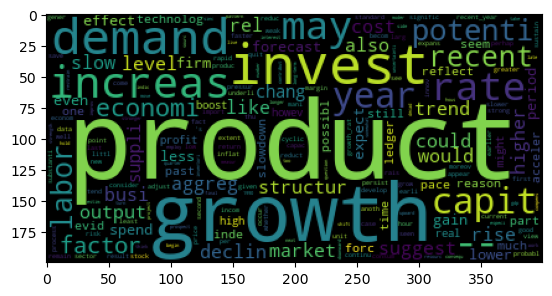

In [583]:
plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(35, 200))))

NMF topics

44 employment

42 financial market

38 expectations

37 labor market

36 risk

35 ?

32 "term"

30 "economy"

27 ffr

26 "business"

25 interest rates

23 asset purchases?

22 "bank" balance sheets?

18 core pce inflation projections

17 forecasts

16 inflation

15 unemployment

11 ffr

9 growth

8 monetary (fiscal) policy

7 price levels

4 "data"

In [144]:
for i in range(45):
    print(nmf.show_topic(i, 10)[0:5])
    print('\n')

[("'s", 0.39649051280680975), ('let', 0.010207349234845252), ('staff', 0.007546915070563938), ('import', 0.0074702011399165645), ('today', 0.007024655880229109)]


[('think', 0.35418546445670646), ('import', 0.013396191882474078), ('way', 0.0128590284596527), ('us', 0.012744809409308446), ('need', 0.012482601307364748)]


[("''", 0.20616806203048066), ('``', 0.20222229237210612), ('say', 0.025889784763009245), ('word', 0.015307205922765623), ('econom', 0.012183836255867641)]


[("n't", 0.2793228967599541), ('chang', 0.045245678015322886), ('know', 0.03510226291538849), ('much', 0.03436656554596637), ('realli', 0.019638795206488882)]


[('data', 0.1867119286747923), ('incom', 0.03189709775589378), ('econom', 0.020114683057510747), ('last', 0.01968342925180625), ('look', 0.01732525501695691)]


[('percent', 0.2659319236088492), ('2', 0.04824411785363075), ('3', 0.015056604495352986), ('1', 0.014498872170918484), ('gdp', 0.011337273987868669)]


[('year', 0.28164884109649896), ('next', 0.

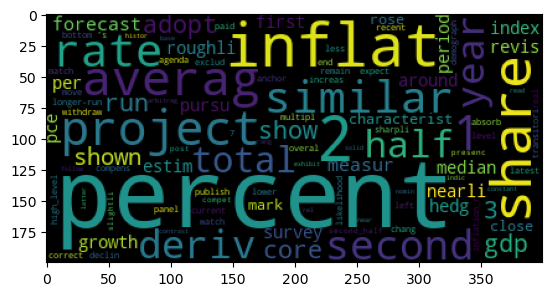

In [303]:
plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(14, 200))))

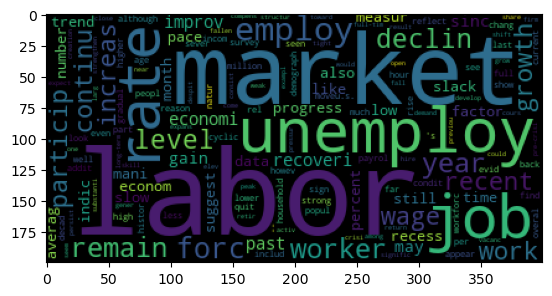

In [110]:
plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(6, 200))))

In [487]:
def get_max_topic(tokens):
    topic_probs = nmf[dictionary.doc2bow(tokens)]
    if len(topic_probs) > 0:
        max_prob = topic_probs[0][1]
        max_ind = 0
        for i in range(1, len(topic_probs)):
            if topic_probs[i][1] > max_prob:
                max_prob = topic_probs[i][1]
                max_ind = i
        return pd.Series([topic_probs[max_ind][0], max_prob], index=['topic', 'prob'])
    return pd.Series([None, None], index=['topic', 'prob'])

get_max_topic(tdf.loc[205].tokens)

[(0, 0.22982931844332238), (3, 0.006064672707542939), (4, 0.00411476679532423), (5, 0.31380085446080264), (6, 0.10521444370169349), (9, 0.0007210869601999902), (18, 0.21149594909681899), (19, 0.014213836399375282), (20, 0.003915786899366396), (23, 0.0019623029518893373), (25, 0.029323307179473786), (32, 0.0017333808246226285), (33, 0.06890445417181804), (35, 0.006816483192542763), (41, 0.0018893562152070187)]


topic    5.000000
prob     0.313801
dtype: float64

In [488]:
def get_all_topics(tokens):
    topic_probs = nmf[dictionary.doc2bow(tokens)]
    result = [0] * 45
    for topic, prob in topic_probs:
        result[topic] = prob
    return pd.Series(result)

In [564]:
tdf[[f'tprob_{i}' for i in range(45)]] = tdf.tokens.apply(get_all_topics)

In [493]:
tdf

,Unnamed: 0.1,Unnamed: 0,content,speaker,date,type,index,text_enhanced,tokens,topic,...,tprob_35,tprob_36,tprob_37,tprob_38,tprob_39,tprob_40,tprob_41,tprob_42,tprob_43,tprob_44
0,0,0,"Good morning, everybody.",CHAIR YELLEN.,2015-03-18,meeting,0,"Good morning, everybody.","[good, morn, everybodi]",26.0,...,0.070285,0.000000,0.004485,0.079340,0.069685,0.000000,0.020754,0.0,0.000000,0.094404
1,1,1,"As you know, we had a farewell luncheon for Pr...",CHAIR YELLEN.,2015-03-18,meeting,1,"As you know, we had a farewell luncheon for Pr...","[know, farewel, luncheon, presid, plosser, jan...",41.0,...,0.000000,0.000000,0.358682,0.000000,0.000000,0.000000,0.000804,0.0,0.127442,0.000000
2,2,2,"And in a couple of hours, we will also have a ...",CHAIR YELLEN.,2015-03-18,meeting,2,"And in a couple of hours, we will also have a ...","[coupl, hour, also, chanc, say, farewel, presi...",26.0,...,0.000000,0.000000,0.282914,0.000000,0.000000,0.004506,0.000000,0.0,0.098926,0.000000
3,3,3,"In light of those departures, I would like to ...",CHAIR YELLEN.,2015-03-18,meeting,3,"In light of those departures, I would like to ...","[light, departur, would, like, welcom, helen, ...",28.0,...,0.010051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000862,0.0,0.000000,0.000000
4,4,4,She represented the Federal Reserve Bank of Da...,CHAIR YELLEN.,2015-03-18,meeting,4,She represented the Federal Reserve Bank of Da...,"[repres, feder, reserv, bank, dalla, presid, f...",22.0,...,0.000000,0.000000,0.149300,0.000000,0.007821,0.000000,0.000000,0.0,0.053249,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400982,400982,400982,And I think that question is not yet fully res...,CHAIRMAN BERNANKE.,2012-03-13,meeting,3092,And I think that question is not yet fully res...,"[think, question, yet, fulli, resolv]",1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000154,0.000000
400983,400983,400983,Okay.,MR. LACKER.,2012-03-13,meeting,3093,Okay.,[okay],2.0,...,0.000000,0.000000,0.000000,0.100017,0.102578,0.000000,0.000000,0.0,0.008145,0.000000
400984,400984,400984,Okay.,CHAIRMAN BERNANKE.,2012-03-13,meeting,3094,Okay.,[okay],2.0,...,0.000000,0.000000,0.000000,0.099994,0.102589,0.000000,0.000000,0.0,0.008032,0.000000
400985,400985,400985,"Thank you, all.",CHAIRMAN BERNANKE.,2012-03-13,meeting,3095,"Thank you, all.",[thank],13.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


<Axes: xlabel='date'>

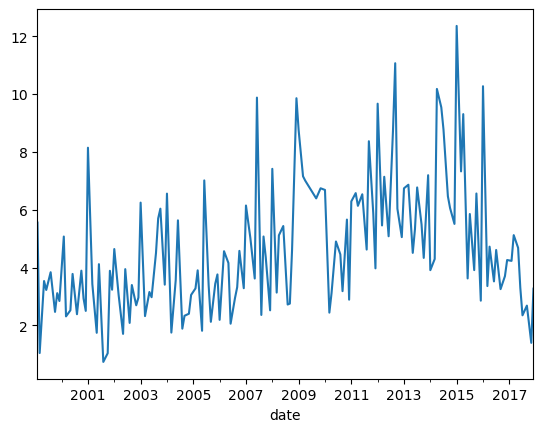

In [587]:
mtdf = tdf[tdf['type'] == 'meeting'] 
mtdf[['tprob_35', 'date']].groupby(pd.PeriodIndex(mtdf['date'], freq='M'))['tprob_35'].sum().plot()

In [472]:
tdf_sample = tdf.sample(5000)

In [473]:
tdf_sample[['topic','topic_prob']] = tdf_sample.tokens.apply(get_topics)

9 prices, somewhat inflation

In [479]:
tdf_sample[tdf_sample['topic'] == 5][['content', 'topic_prob']].to_csv('topictest.csv')

In [201]:
sdf[['topic', 'topic_prob']] = sdf.tokens.apply(get_topics)

In [202]:
tdf[['topic', 'topic_prob']] = tdf.tokens.apply(get_topics)

In [ ]:
for item in sdf[sdf['topic'] == 6.0]['text'][:25]:
    print(item)

In [ ]:
for item in tdf[tdf['topic'] == 6.0]['condensed'][:25]:
    print(item)

In [ ]:
for item in tdf[tdf['topic'] == 3.0]['condensed'][:25]:
    print(item)

In [ ]:
for item in sdf[sdf['topic'] == 3.0]['text'][:25]:
    print(item)

In [209]:
path = "Loughran-McDonald_MasterDictionary_1993-2021.csv"

lm_df = pd.read_csv(path)

lm = {}

for i, row in lm_df.iterrows():
    # print(row)
    word = str(row['Word']).lower()
    if row['Negative'] != 0:
        lm[word] = -1
    if row['Positive'] != 0:
        lm[word] = 1

In [219]:
def sentscore(string):
    # tokens = process(string)
    total = 0
    tokens = [token.lower() for token in word_tokenize(str(string))]
    numtokens = len(tokens) if len(tokens) > 0 else 1
    for token in tokens:
        # print(token)
        if token in lm:
            total += lm[token]
            # print(token)
            # print(lm[token])
    # print(total)
    # print(tokens)
    return total

In [220]:
tdf['lm_sent'] = tdf['content'].apply(sentscore)

In [221]:
sdf['lm_sent'] = sdf['text'].apply(sentscore)

In [225]:
speech_infl = sdf[sdf['topic'] == 9][['date', 'lm_sent']]
speech_infl['date'] = pd.to_datetime(speech_infl['date'])
sinfdf = speech_infl.groupby(pd.PeriodIndex(speech_infl['date'], freq='M'))['lm_sent'].sum()

In [229]:
transcript_infl = tdf[tdf['topic'] == 9][['date', 'lm_sent']]
transcript_infl['date'] = pd.to_datetime(transcript_infl['date'])
tinfdf = transcript_infl.groupby(pd.PeriodIndex(transcript_infl['date'], freq='M'))['lm_sent'].sum()

In [236]:
speech_grow = sdf[sdf['topic'] == 37][['date', 'lm_sent']]
speech_grow['date'] = pd.to_datetime(speech_grow['date'])
sgrowdf = speech_grow.groupby(pd.PeriodIndex(speech_grow['date'], freq='M'))['lm_sent'].sum()

In [237]:
transcript_grow = tdf[tdf['topic'] == 37][['date', 'lm_sent']]
transcript_grow['date'] = pd.to_datetime(transcript_grow['date'])
tgrowdf = transcript_grow.groupby(pd.PeriodIndex(transcript_grow['date'], freq='M'))['lm_sent'].sum()

<Axes: xlabel='date'>

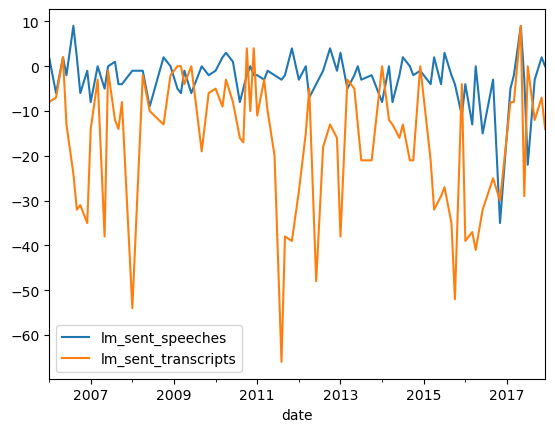

In [227]:
merged_inf = pd.merge(sinfdf, tinfdf, on='date', suffixes=['_speeches', '_transcripts'])
merged_inf.plot()
# merged_inf

<Axes: xlabel='date'>

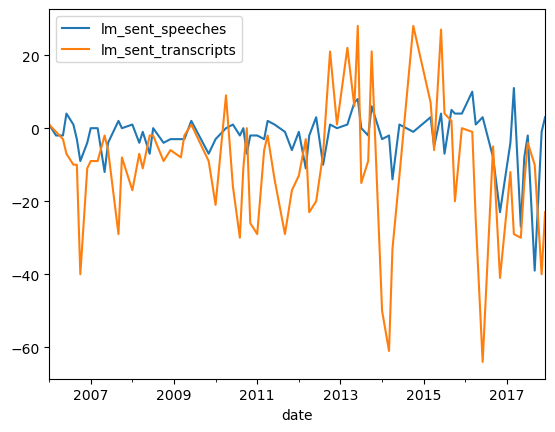

In [238]:
merged_grow = pd.merge(sgrowdf, tgrowdf, on='date', suffixes=['_speeches', '_transcripts'])
merged_grow.plot()